## Some graphs of the percentile algorithm

Blocks are randomly generated with a fee and a gas, the block size is not explicitly capped, but is roughly correct
depending on how many transactions are generated. Occasional large transactions are created, which is the main purpose
of this exploration. Gas prices are all within the range (2-100).

## Questions

Does the API produce a useful "feeling" result? 
- (yes)

How does weighting transactions by gas rather than count affect the results
- (seems good, see below.)

## Graph Interpretation

In the graphs, the blue dots are the fees at the given percentile (can be thought of as maxPriorityFeePerGas). 
The calculation is based on gas, where a 1,000,000 gas transaction will affect the percentile,
10x more than a 100,000 gas transaction.
The yellow dots are the the same, with the percentile calculated based on transaction number.

In the Fee vs Gas scatterplots, outlier transactions have high gas, those values can be taken and mapped to where
the blue and yellow lines diverge.

## Conclusion

The API implemented seems to behave in a way that is useful for small queries and for more detailed analysis. 

The difference between the two is appreciated where the blue line continuous horizontally, where the yellow continues upward.
That is to say, gas-weighted transactions appear to have the effect of lowering the return values, as compared to
the count-based method.

In [2]:
import call_api
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_graphs(block):
    
    request = block['target_percentiles']
    response = block['percentile_response']
    
    # Print some percentile info.
    #count_based_percentiles = np.percentile(block['fee'], np.arange(0, 100, 10))
    count_based_percentiles = np.percentile(block['fee'], np.array(request))
    count_percentiles = [int(count_based_percentiles[i]) for i in range(len(count_based_percentiles))]
    print("API target percentiles were:\n\t\t\t", request)
    print("API response: Fees at requested percentiles (calculated by gas):\n\t\t\t", response)
    print("For comparison, percentiles based on transaction count are:\n\t\t\t",count_percentiles)


    print("This graph is the API response (blue):")
    fig, ax = plt.subplots()

    data_plot = pd.DataFrame({"Requested Percentile":request, "Count-based percentiles":count_based_percentiles})
    sns.scatterplot(x = "Requested Percentile", y = "Count-based percentiles", data=data_plot, ax=ax, color='y')
    ax2 = ax.twinx()
    data_plot = pd.DataFrame({"Requested Percentile":request, "Fee Response":response})
    sns.scatterplot(x = "Requested Percentile", y = "Fee Response", data=data_plot, ax=ax2)    
    plt.show()

    print("\nSome other graphs of the block characteristics are below:")
    data_plot = pd.DataFrame({"Gas":block['gas'], "Fee":block['fee']})

    sns.scatterplot(x = "Fee", y = "Gas", data=data_plot)
    plt.show()

    sns.ecdfplot(x = "Fee", data=data_plot)
    plt.show()

    sns.histplot(x = "Fee", data=data_plot, discrete = True)
    plt.show()

    sns.ecdfplot(x = "Gas", data=data_plot)
    plt.show()


API target percentiles were:
			 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
API response: Fees at requested percentiles (calculated by gas):
			 [3, 11, 12, 12, 12, 12, 12, 12, 12, 12, 99]
For comparison, percentiles based on transaction count are:
			 [3, 12, 17, 25, 36, 46, 52, 58, 65, 83, 99]
This graph is the API response (blue):


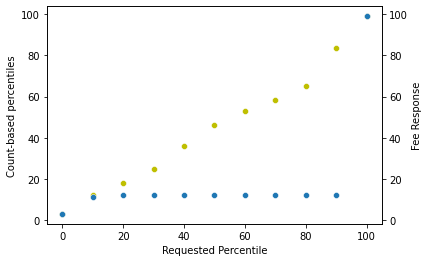


Some other graphs of the block characteristics are below:


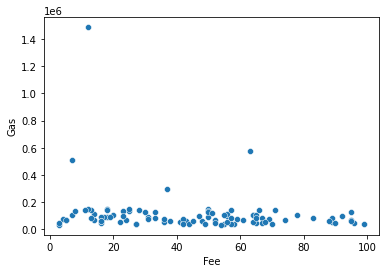

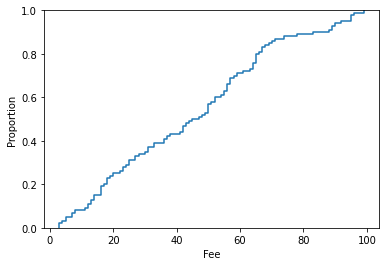

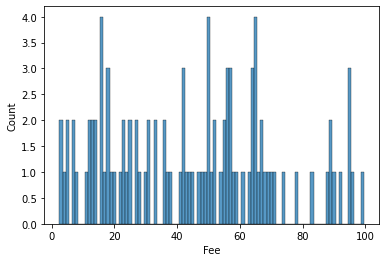

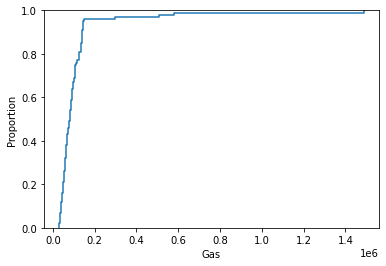

In [4]:
# Get some data
data = call_api.get_multiblock_stats(
    target_percentiles=None, blocks=1, transactions = 100
    )
block = data['blocks'][0]
get_graphs(block)

API target percentiles were:
			 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
API response: Fees at requested percentiles (calculated by gas):
			 [2, 10, 18, 28, 38, 46, 56, 68, 76, 88, 99]
For comparison, percentiles based on transaction count are:
			 [2, 10, 19, 30, 39, 49, 57, 70, 79, 89, 99]
This graph is the API response (blue):


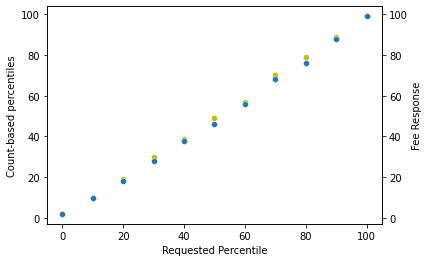


Some other graphs of the block characteristics are below:


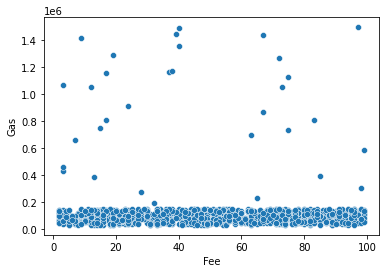

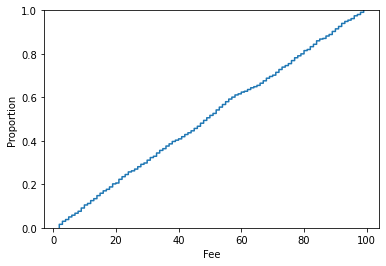

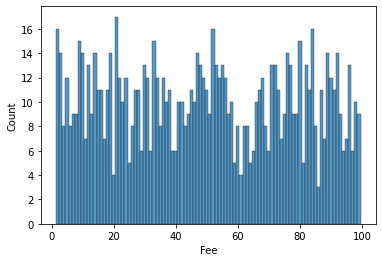

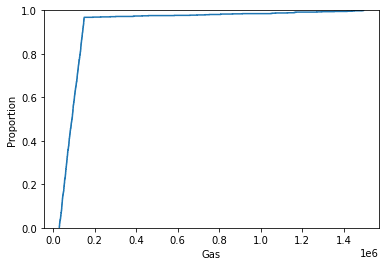

In [5]:
# Get some data
data = call_api.get_multiblock_stats(
    target_percentiles=None, blocks=1, transactions = 1000
    )
block = data['blocks'][0]
get_graphs(block)

API target percentiles were:
			 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
API response: Fees at requested percentiles (calculated by gas):
			 [2, 10, 16, 24, 35, 42, 47, 58, 59, 59, 99]
For comparison, percentiles based on transaction count are:
			 [2, 10, 17, 26, 35, 42, 47, 60, 70, 87, 99]
This graph is the API response (blue):


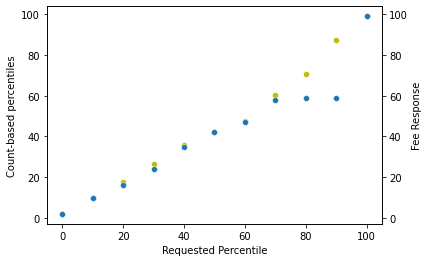


Some other graphs of the block characteristics are below:


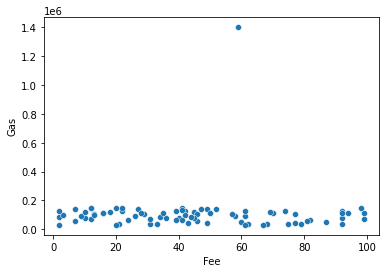

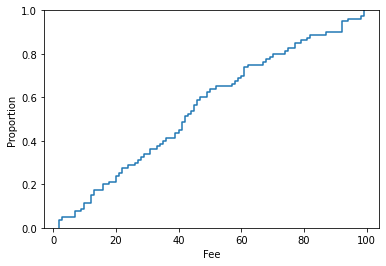

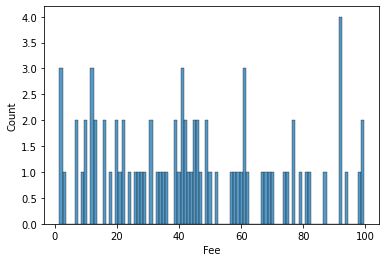

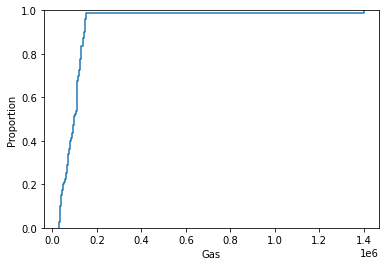

In [6]:
# Get some data
data = call_api.get_multiblock_stats(
    target_percentiles=None, blocks=1, transactions = 80
    )
block = data['blocks'][0]
get_graphs(block)

API target percentiles were:
			 [0, 25, 50, 75, 100, 100]
API response: Fees at requested percentiles (calculated by gas):
			 [2, 34, 56, 68, 87, 98]
For comparison, percentiles based on transaction count are:
			 [2, 31, 54, 76, 98, 98]
This graph is the API response (blue):


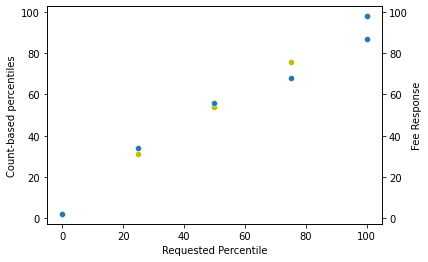


Some other graphs of the block characteristics are below:


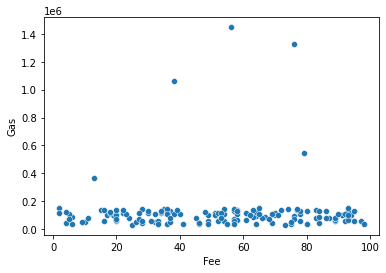

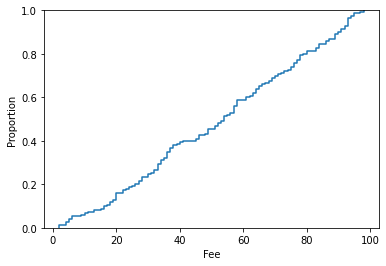

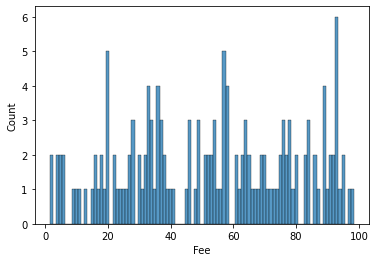

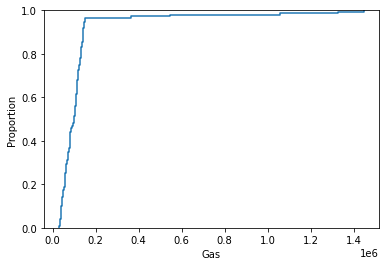

In [7]:
quartiles = [0,25,50,75,100]

# Get some data
data = call_api.get_multiblock_stats(
    target_percentiles=quartiles, blocks=1, transactions = 150
    )
block = data['blocks'][0]
get_graphs(block)


API target percentiles were:
			 [50, 100]
API response: Fees at requested percentiles (calculated by gas):
			 [50, 98]
For comparison, percentiles based on transaction count are:
			 [53, 98]
This graph is the API response (blue):


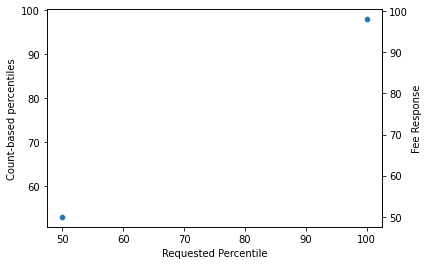


Some other graphs of the block characteristics are below:


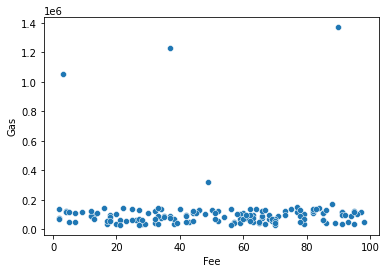

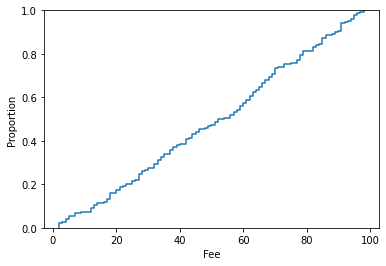

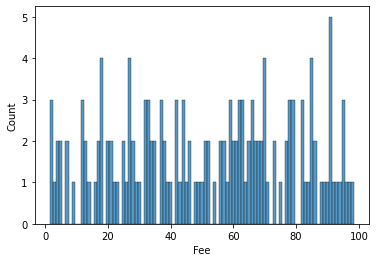

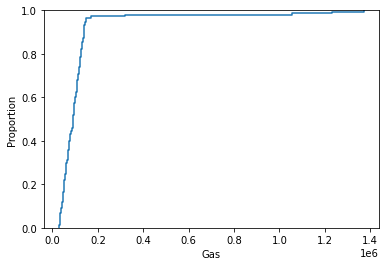

In [8]:
query = [50]

# Get some data
data = call_api.get_multiblock_stats(
    target_percentiles=query, blocks=1, transactions = 150
    )
block = data['blocks'][0]
get_graphs(block)


API target percentiles were:
			 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 70, 90, 100]
API response: Fees at requested percentiles (calculated by gas):
			 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 22, 46, 59, 99]
For comparison, percentiles based on transaction count are:
			 [2, 4, 5, 5, 6, 8, 9, 9, 9, 9, 36, 50, 72, 90, 99]
This graph is the API response (blue):


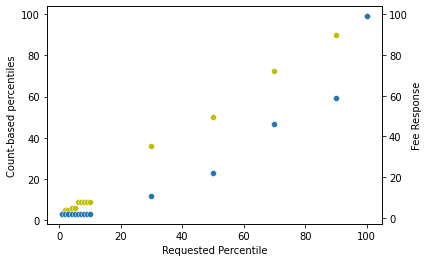


Some other graphs of the block characteristics are below:


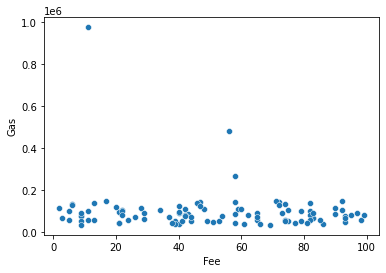

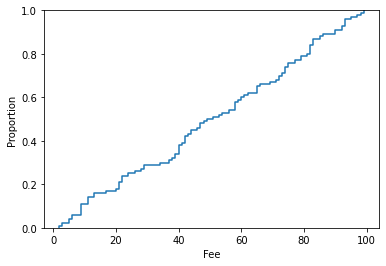

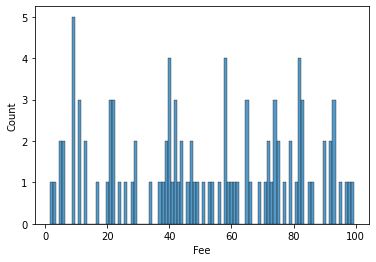

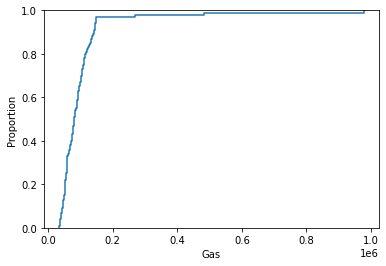

In [9]:
query = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 70, 90]

# Get some data
data = call_api.get_multiblock_stats(
    target_percentiles=query, blocks=1, transactions = 100
    )
block = data['blocks'][0]
get_graphs(block)

API target percentiles were:
			 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 100]
API response: Fees at requested percentiles (calculated by gas):
			 [2, 2, 4, 4, 5, 5, 6, 7, 8, 9, 10, 10, 11, 12, 13, 15, 17, 17, 17, 17, 99]
For comparison, percentiles based on transaction count are:
			 [2, 3, 4, 5, 5, 6, 7, 9, 10, 11, 11, 14, 15, 17, 18, 19, 19, 20, 20, 22, 99]
This graph is the API response (blue):


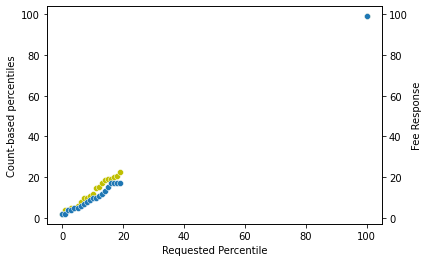


Some other graphs of the block characteristics are below:


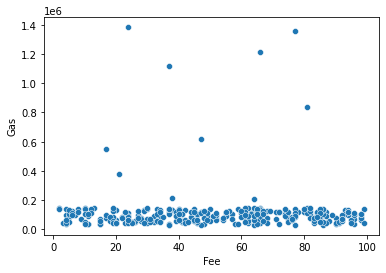

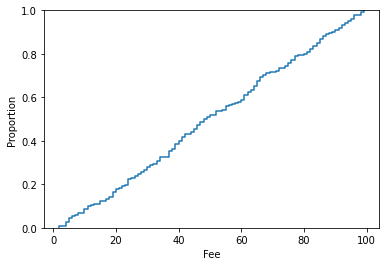

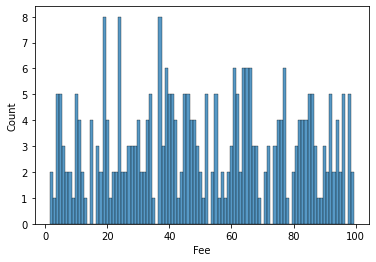

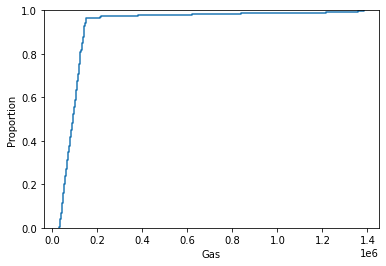

In [10]:
query = [i  for i in range(20)]

# Get some data
data = call_api.get_multiblock_stats(
    target_percentiles=query, blocks=1, transactions = 300
    )
block = data['blocks'][0]
get_graphs(block)


API target percentiles were:
			 [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 100]
API response: Fees at requested percentiles (calculated by gas):
			 [12, 16, 17, 17, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 99]
For comparison, percentiles based on transaction count are:
			 [11, 12, 15, 17, 20, 21, 22, 23, 26, 29, 30, 32, 33, 35, 36, 41, 43, 44, 46, 48, 99]
This graph is the API response (blue):


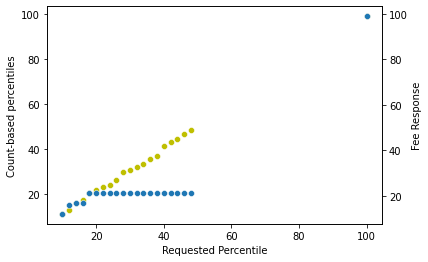


Some other graphs of the block characteristics are below:


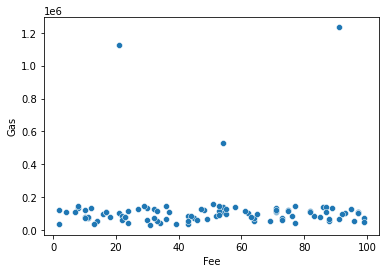

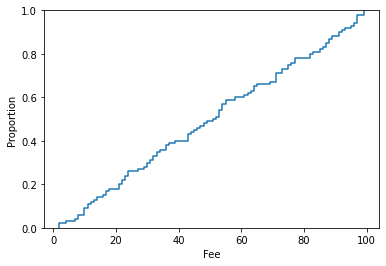

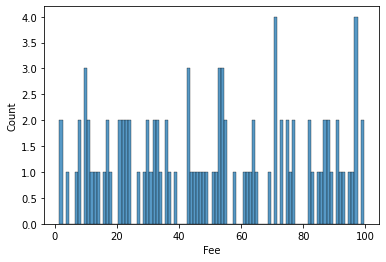

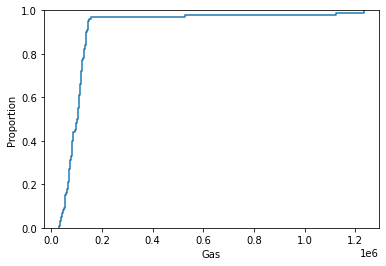

In [11]:
query = [10+2*i for i in range(20)]

# Get some data
data = call_api.get_multiblock_stats(
    target_percentiles=query, blocks=1, transactions = 100
    )
block = data['blocks'][0]
get_graphs(block)